# Preprocessing Train Dataset

In [ ]:
# Make necessary imports
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import joblib

In [1]:
# Read Train dataset
df_train = pd.read_csv(r"C:\Users\saina\OneDrive\Desktop\PROJECT_4\Data\GUIDE_Train.csv\GUIDE_Train.csv")

In [2]:
df_train.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
pd.set_option('display.max_columns', None)    # to display full sized dataframe

In [4]:
df_train.isna().sum()  # Null values in each column

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [5]:
# drop duplicate rows

print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True)
print(df_train.duplicated().sum())

22559
0


In [6]:
# Dropping rows with 50% or more null values 

thresh = len(df_train) * 0.5   #thresh has a int value of no of 50% rows
df_train = df_train.dropna(thresh = thresh,axis=1)

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9494278 entries, 0 to 9516836
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountObjectId     int64 
 18  AccountName         int64 
 19  DeviceName          int64 
 20  NetworkMessageId    int64 
 21  RegistryKey         int64 
 22  RegistryValueName   int64 
 23  RegistryValueData   int64 
 24  ApplicationId       int64 
 25  ApplicationName     int

In [7]:
df_train.shape

(9494278, 35)

In [8]:
df_train.isna().sum()

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51322
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [9]:
df_train = df_train.dropna(subset=['IncidentGrade'])  # drop rows where IncidentGrade is null

In [10]:
df_train.nunique()

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
Timestamp              755654
DetectorId               7813
AlertTitle              79952
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State     

In [11]:
df_train.shape

(9442956, 35)

In [12]:
df_train['Timestamp'].head(2)

0    2024-06-04T06:05:15.000Z
1    2024-06-14T03:01:25.000Z
Name: Timestamp, dtype: object

In [13]:
# Feature engineering - Converting Timestamp column into Day, Month and Hour

df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'])
df_train['Day']=df_train['Timestamp'].dt.day
df_train['Month']=df_train['Timestamp'].dt.month
df_train['Hour']=df_train['Timestamp'].dt.hour
df_train.drop('Timestamp',axis=1,inplace=True)

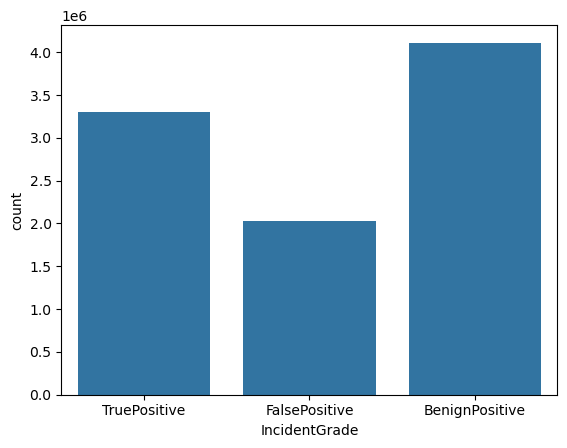

In [14]:
# Count plot by Target column classes 

sns.countplot(x='IncidentGrade', data=df_train)
plt.show()

In [15]:
df_train['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    4110748
TruePositive      3302644
FalsePositive     2029564
Name: count, dtype: int64

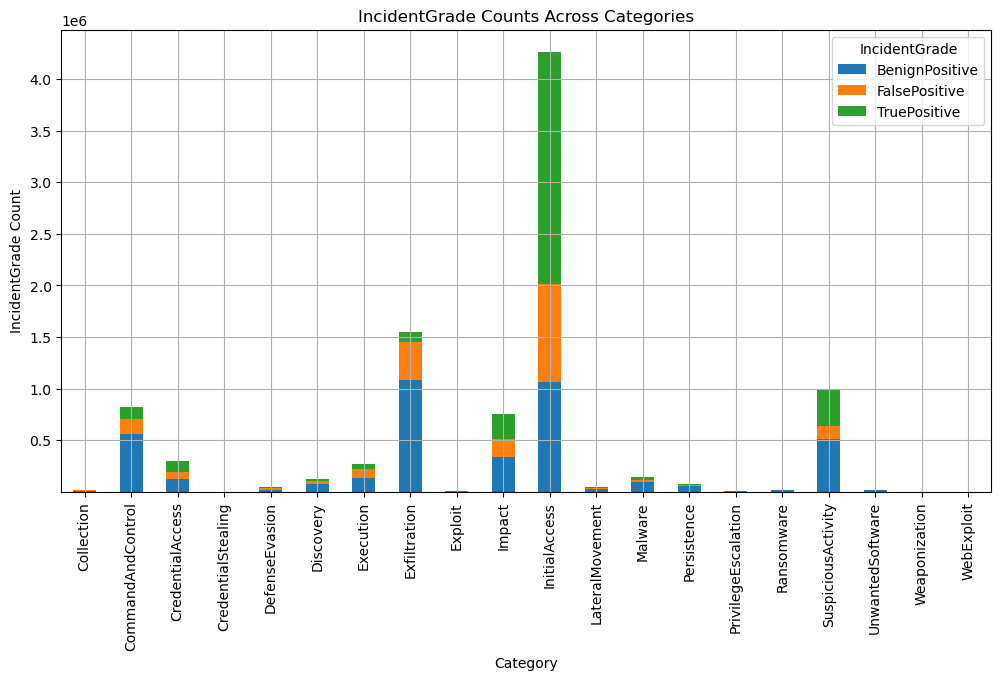

In [16]:
# Bar plot of IncidentGrade count by Category

grouped_data=df_train.groupby(["Category","IncidentGrade"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Category')
plt.ylabel('IncidentGrade Count')
plt.title('IncidentGrade Counts Across Categories')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

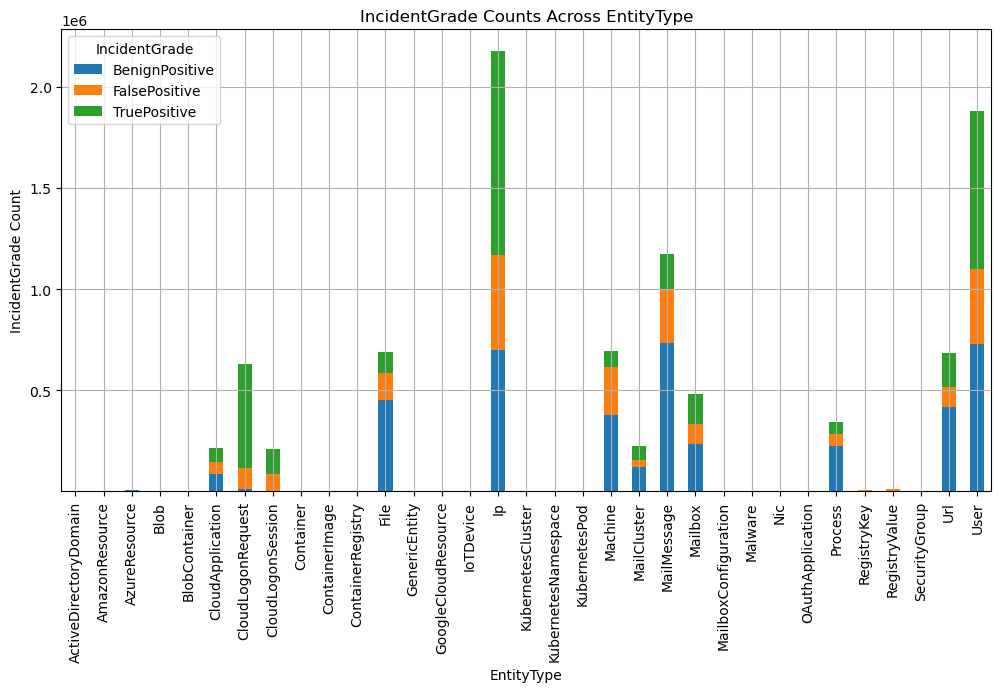

In [17]:
# Bar plot of IncidentGrade count by EntityType

grouped_data=df_train.groupby(["EntityType","IncidentGrade"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('EntityType')
plt.ylabel('IncidentGrade Count')
plt.title('IncidentGrade Counts Across EntityType')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

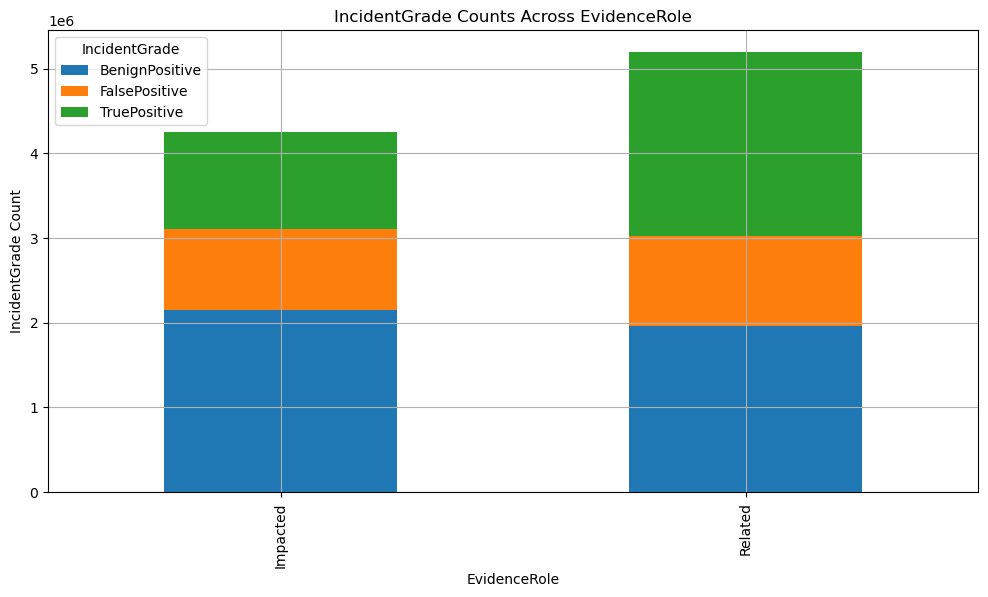

In [18]:
# Bar plot of IncidentGrade count by Evidence

grouped_data=df_train.groupby(["EvidenceRole","IncidentGrade"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('EvidenceRole')
plt.ylabel('IncidentGrade Count')
plt.title('IncidentGrade Counts Across EvidenceRole')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

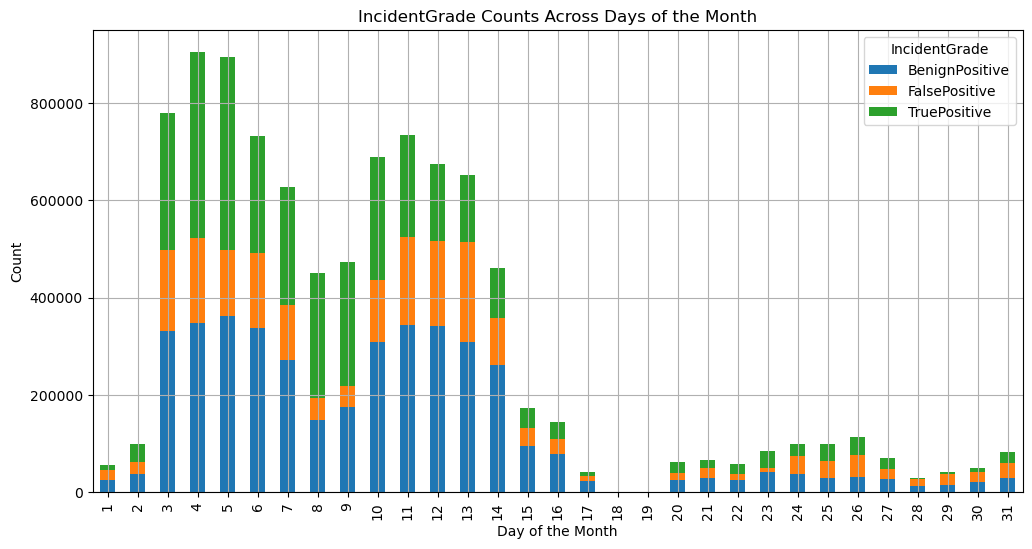

In [19]:
# Bar plot of IncidentGrade count by Day of the month

day_incident_grade = df_train.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()
     

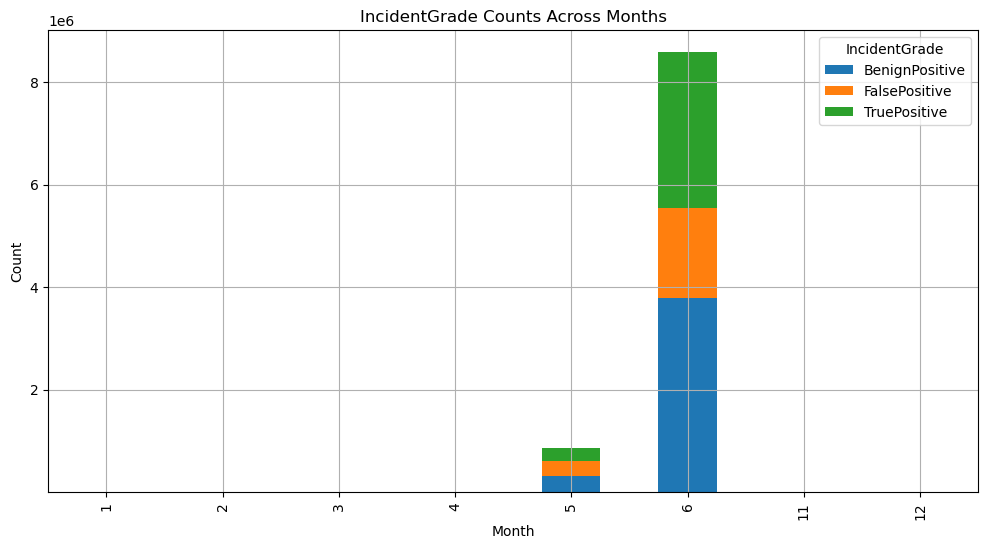

In [20]:
# Bar plot of IncidentGrade count by Month

day_incident_grade = df_train.groupby(['Month', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Months')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()
     

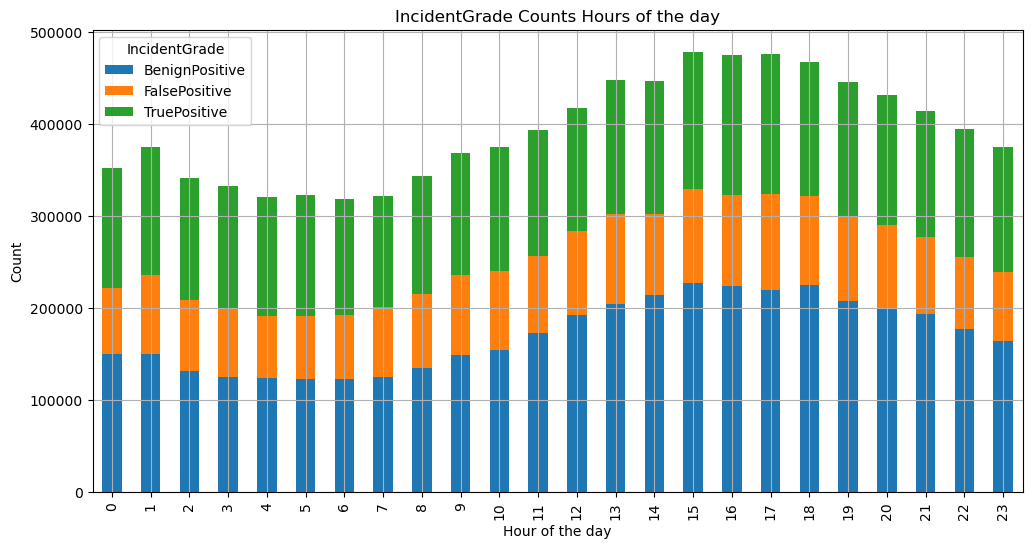

In [21]:
# Bar plot of IncidentGrade count by Hour of the day

day_incident_grade = df_train.groupby(['Hour', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Hours of the day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()
     

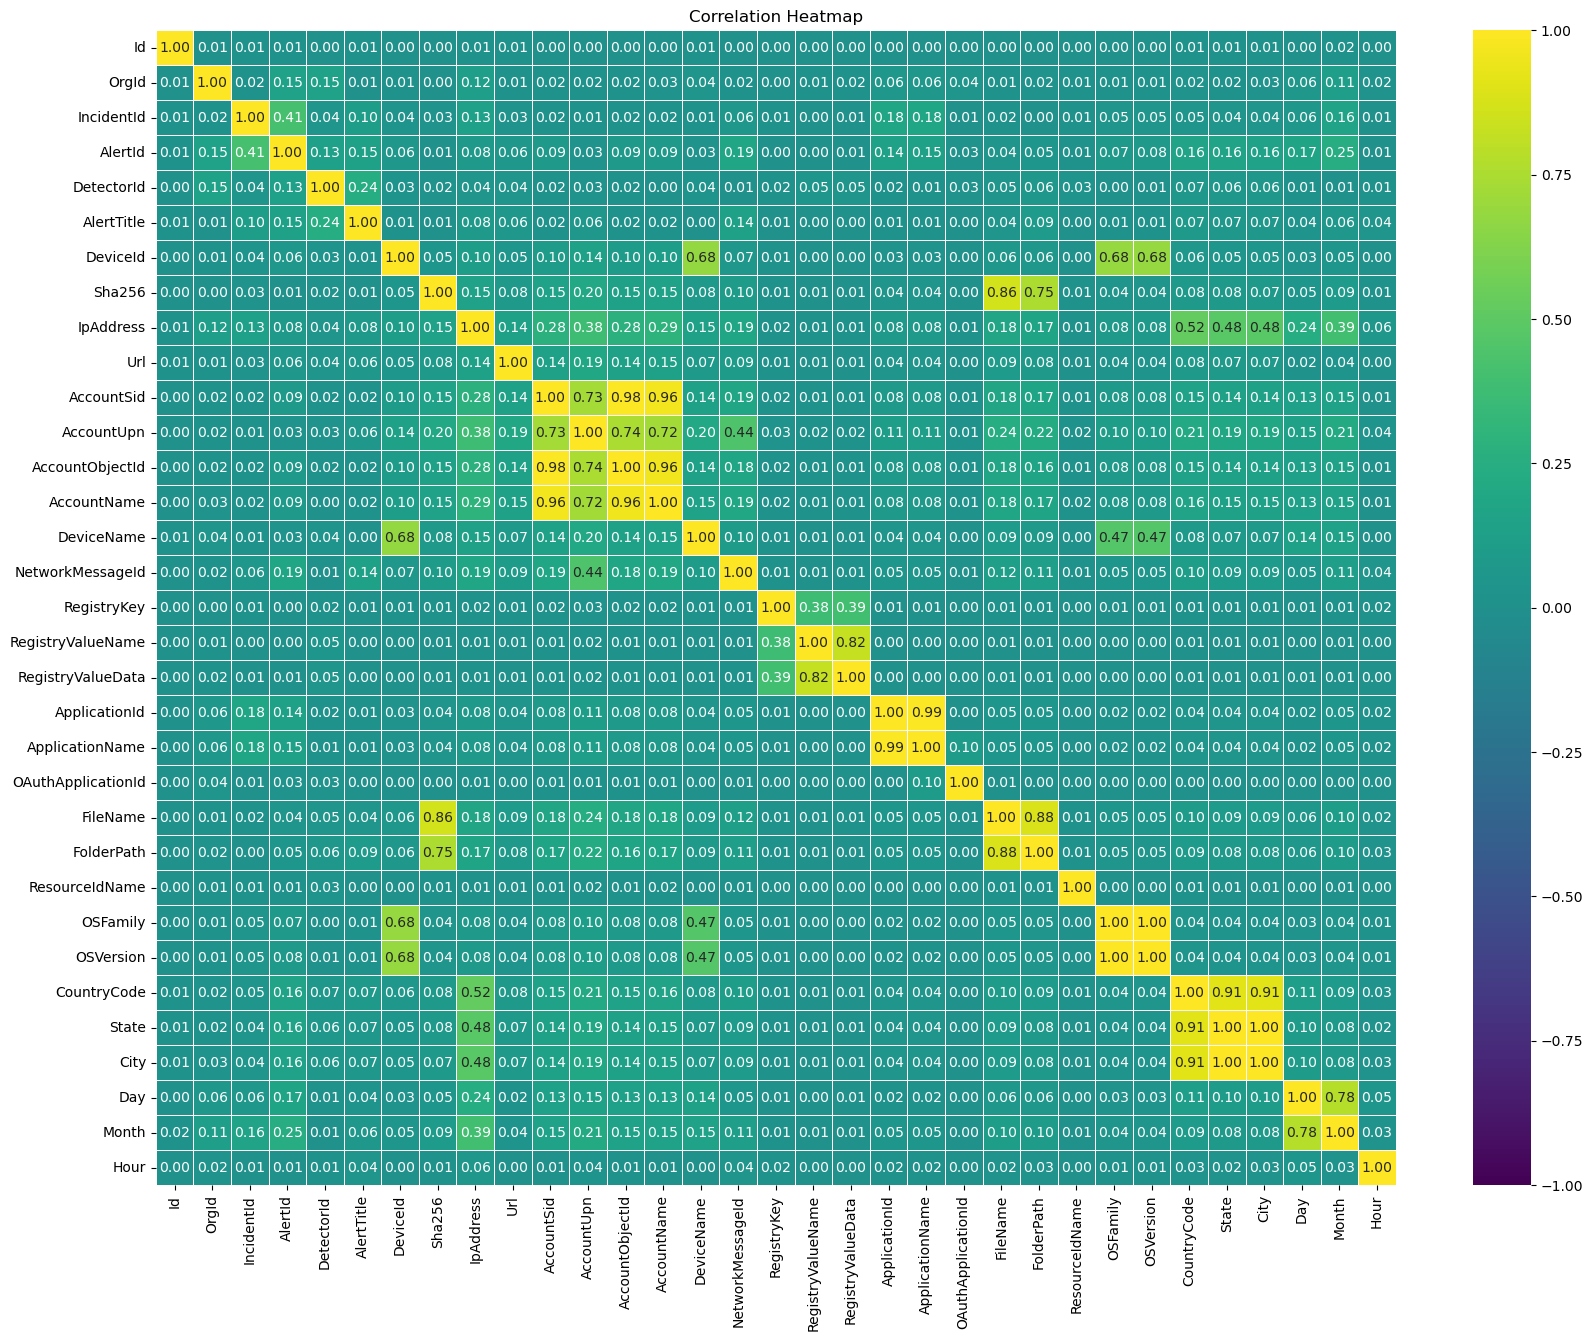

In [22]:
# Correlation heatmap for all numerical columns in our dataset

numerical_df = df_train.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
# Dropping columns that are highly correlated (≥ 80%) to reduce redundancy and multicollinearity,
# ensuring a more efficient and interpretable model by retaining only unique features.

In [24]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y]) 
                    for x, y in zip(*high_corr_var) 
                    if x != y and x < y]
high_corr_pairs

[('Sha256', 'FileName'),
 ('AccountSid', 'AccountObjectId'),
 ('AccountSid', 'AccountName'),
 ('AccountObjectId', 'AccountName'),
 ('RegistryValueName', 'RegistryValueData'),
 ('ApplicationId', 'ApplicationName'),
 ('FileName', 'FolderPath'),
 ('OSFamily', 'OSVersion'),
 ('CountryCode', 'State'),
 ('CountryCode', 'City'),
 ('State', 'City')]

In [25]:
# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
        columns_to_remove.add(col2)  # Default to adding the second column in each pair

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = df_train.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
df_cleaned_corr.head()

Columns removed: ['State', 'AccountObjectId', 'OSVersion', 'AccountName', 'FolderPath', 'City', 'FileName', 'ApplicationName', 'RegistryValueData']


,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,31,4,6,6
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,153085,529644,1631,635,2251,881,3586,5,242,14,6,3
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,13,6,4
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,10,6,16
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,153085,529644,1631,635,2251,881,3586,5,242,15,6,1


In [26]:
# Label encoding for categorical columns. We are not using Onehot encoding because there are very high number of categories in categorical columns

categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

   Category  IncidentGrade  EntityType  EvidenceRole  DeviceId  Sha256  \
0        10              2          15             1     98799  138268   
1         7              1          32             0     98799  138268   
2        10              1          31             1     98799  138268   
3         1              0          31             1     98799  138268   
4         6              2          32             0     98799  138268   

   IpAddress     Url  AccountSid  AccountUpn  DeviceName  NetworkMessageId  \
0         27  160396      441377      673934

In [27]:
# Save label encoders for categorical features, for easy use on test dataset

for column, le in label_encoders.items():
    joblib.dump(le, f'labels/{column}_label_encoder.pkl')

In [28]:
# Save the cleaned/processed train dataset

df_cleaned_corr.to_csv('train_data_processed.csv', index=False)

# Preprocessing Test dataset

In [36]:
# Read Test Dataset

df_test = pd.read_csv(r"C:\Users\saina\OneDrive\Desktop\PROJECT_4\Data\GUIDE_Test.csv\GUIDE_Test.csv")

C:\Users\saina\AppData\Local\Temp\ipykernel_8272\497884179.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(r"C:\Users\saina\OneDrive\Desktop\PROJECT_4\Data\GUIDE_Test.csv\GUIDE_Test.csv")


In [37]:
df_test.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [38]:
# Following the same steps that have been applied on Train dataset

df_test.drop_duplicates(inplace=True)
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])
df_test['Day']=df_test['Timestamp'].dt.day
df_test['Month']=df_test['Timestamp'].dt.month
df_test['Hour']=df_test['Timestamp'].dt.hour
df_test.drop('Timestamp',axis=1,inplace=True)


In [39]:
df_test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)
df_test.drop('Usage',axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   MitreTechniques     object 
 8   IncidentGrade       object 
 9   ActionGrouped       object 
 10  ActionGranular      object 
 11  EntityType          object 
 12  EvidenceRole        object 
 13  DeviceId            int64  
 14  Sha256              int64  
 15  IpAddress           int64  
 16  Url                 int64  
 17  AccountSid          int64  
 18  AccountUpn          int64  
 19  DeviceName          int64  
 20  NetworkMessageId    int64  
 21  EmailClusterId      float64
 22  RegistryKey         int64  
 23  RegistryValueName   int64  
 24  ApplicationId       int64  
 

In [40]:
# Keeping only required columns as we have done for train dataset.

df_test = df_test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,153085,529644,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,2833,529644,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,153085,529644,1631,635,2251,881,3586,5,242,6,6,17


In [41]:
# Load label encoder and perform encoding on categorical columns in Test dataset

loaded_label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']  # list your categorical columns
for column in categorical_cols:
    loaded_label_encoders[column] = joblib.load(f'labels/{column}_label_encoder.pkl')


# Apply label encoding to categorical features
for column, le in loaded_label_encoders.items():
    if column in df_test.columns:
        df_test[column] = le.transform(df_test[column])

df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,32,0,98799,138268,360606,160396,2610,3699,153085,529644,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,19,0,1239,138268,360606,160396,441377,673934,2833,529644,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,27,1,98799,4296,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,32,0,98799,138268,360606,160396,133549,673934,153085,529644,1631,635,2251,881,3586,5,242,6,6,17


In [42]:
# Finally save the cleaned/preprocessed Test Dataset 

df_test.to_csv('test_data_processed.csv', index=False)